### ER en Python
![xkcd venn](images/er.png)

In [1]:
import re

In [2]:
from IPython.display import IFrame
IFrame('https://docs.python.org/3/howto/regex.html', width=900, height=350)

#### Patrones Básicos

- a, X, 9 cualquier caracter que matchea especificamente ese valor.Caracteres con significado especial son: . ^ $ * + ? { [ ] \ | ( )

- . (punto) matchea cualquier caracter excepto '\n'
- \w Cualquier caracter perteneciente a [a-zA-Z0-9_].
- \b -- boundary between word and non-word
- \s Busca espacio en blanco (newline, return, tab, form [ \n\r\t\f]).
- \S Busca cualquier caracter que no sea un espacio en blanco.
- \t, \n, \r  tab, newline, return
- \d digitos del [0-9]
- ^ Comienzo de cadena
- $ Fin de cadena
- 'Escapeo' de caracteres especiales \

In [3]:
match = re.search(r'^\w\w\w\w\w\s\w\w\w\w', 'Never tell me the odds! - Han Solo')
if match:
    print(match.group())

Never tell


In [4]:
match = re.findall(r'(\w\w\w\s\w\w\w\w)$', 'Never tell me the odds! - Han Solo')
if match:
    print(match)

['Han Solo']


#### Repeticiones dentro de patrones

- \+ 1 o más ocurrencias
- \* 0 o más ocurrencias
- ? 0 o 1 ocurrencia 

In [5]:
match = re.findall(r'\w+\s\w+', """In time, the suffering of your people will 
                                   persuade you to see our point of view.
                                   - Nute Gunray""")
if match:
    print(match)

['In time', 'the suffering', 'of your', 'people will', 'persuade you', 'to see', 'our point', 'of view', 'Nute Gunray']


In [6]:
match = re.findall(r'\w*\s\w*', """In time, the suffering of your people will 
                                   persuade you to see our point of view.
                                   - Nute Gunray""")
if match:
    print(match)

['In time', ' the', ' suffering', ' of', ' your', ' people', ' will', ' ', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' persuade', ' you', ' to', ' see', ' our', ' point', ' of', ' view', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' Nute', ' Gunray']


In [7]:
match = re.findall(r'\W?,\s\w+', """In time, the suffering of your people will 
                                    persuade you to see our point of view, Nute Gunray""")
if match:
    print(match)

[', the', ', Nute']


In [8]:
quote = """Yoda: Fear is the path to the dark side.
           Fear leads to anger. anger leads to hate. 
           hate leads to suffering. 
           I sense much fear in you."""

In [9]:
match = re.search(r'(^\w+):([\s | \w | \. | \n]*)', quote)
if match:
    print("Author:", match.group(1))
    print("Quote:", match.group(2))

Author: Yoda
Quote:  Fear is the path to the dark side.
           Fear leads to anger. anger leads to hate. 
           hate leads to suffering. 
           I sense much fear in you.


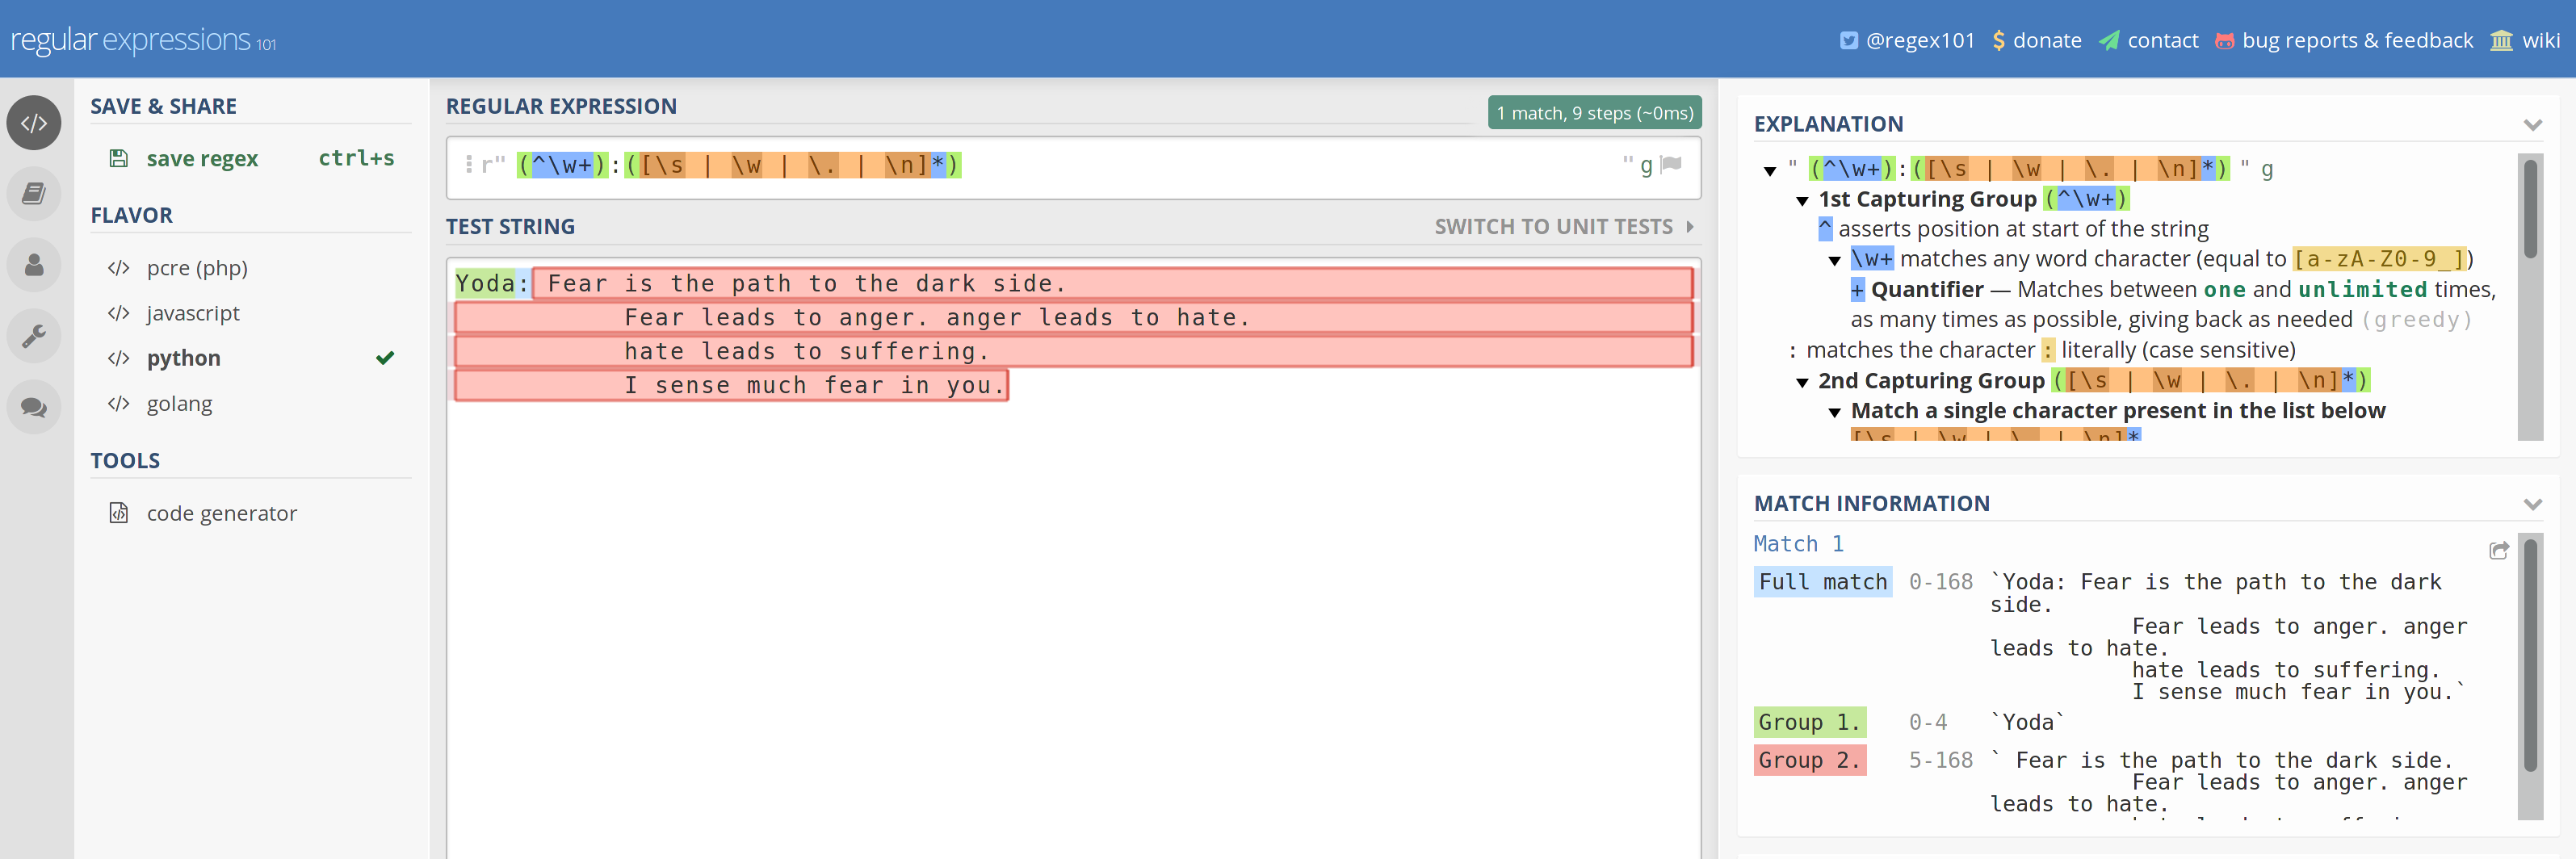

In [10]:
from IPython.display import Image
Image('images/regex101.png', width=900, height=350)

In [11]:
from IPython.display import IFrame
IFrame('https://regex101.com/', width=900, height=350)

#### Compilemos una ER especificamente para extraer emails del archivo MOCK_DATA.json

In [12]:
import json

In [13]:
email_re = re.compile(r'\b[\w.-]+?@\w+?\.\w+?\b')

In [14]:
with open('data/MOCK_DATA.json') as data_file:    
    data = json.load(data_file)


In [15]:
data[0]

{'email': 'csatcher0@vistaprint.com',
 'first_name': 'Cindelyn',
 'gender': 'Female',
 'ip_address': '197.193.194.133',
 'last_name': 'Satcher',
 'text': 'Morbi quis tortor id nulla ultrices aliquet. Maecenas leo odio, condimentum id, luctus nec, molestie sed, justo. Pellentesque viverra pede ac diam. Cras pellentesque volutpat dui. Maecenas tristique, est et tempus semper, est quam pharetra magna, ac consequat metus sapien ut nunc. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Mauris viverra diam vitae quam. Suspendisse potenti. Nullam porttitor lacus at turpis. Donec posuere metus vitae ipsum. Aliquam non mauris.'}

In [17]:
list_emails = [m for line in data for m in email_re.findall(str(line)) if m]
print(list_emails)

['csatcher0@vistaprint.com', 'lbottrell1@deviantart.com', 'eheimes2@slate.com', 'pbeecraft3@google.fr', 'lleedes4@qq.com', 'tizkovitz5@unesco.org', 'omatthis6@go.com', 'hdodell7@usnews.com', 'schesher8@businesswire.com', 'jmossom9@tripod.com', 'atolemana@fotki.com', 'cepslyb@apache.org', 'cfilippozzic@mlb.com', 'pkinsellad@vkontakte.ru', 'bskyrmee@ibm.com', 'pcallejaf@statcounter.com', 'earrang@scientificamerican.com', 'aivaninh@japanpost.jp', 'sparnbyi@plala.or', 'lellawayj@taobao.com', 'gdunmorek@examiner.com', 'nhyldenl@scientificamerican.com', 'dbrandtsm@simplemachines.org', 'emccormackn@ow.ly', 'dfinnicko@printfriendly.com', 'aschutterp@google.com', 'ilonieq@columbia.edu', 'mwattersr@guardian.co', 'alodekes@engadget.com', 'hbootont@digg.com', 'aandersenu@blogs.com', 'ablaydesv@disqus.com', 'talvisw@behance.net', 'cwicksteadx@nasa.gov', 'tsandyy@amazon.com', 'pbownesz@weather.com', 'bfawbert10@nyu.edu', 'jfarbrother11@stanford.edu', 'sdubs12@unesco.org', 'oblenkharn13@topsy.com', '

In [18]:
assert(len(list_emails) == len(set(list_emails)))

#### Cómo seria la ER para direcciones IP?